# COGS 108 - Final Project 

# Overview

Our project aims to determine how a teen’s level of involvement in school may affect alcohol consumption levels. We will be looking at data regarding a teen’s study time, final grades, whether they attend additional paid classes, aim to go to higher education and their amount of school absences. 

# Names

- Yikai Chen
- Shu Yao Wu
- James Beighley
- Falak Hotchandani
- Katherine Ngo

# Group Members IDs

- A13531003
- A13579395
- A13103167
- A15711717
- A14530341

# Research Question

How does involvement and performance in school contribute to changes in alcohol consumption amongst high school students?

## Background and Prior Work

 Unhealthy alcohol use among students is a major public health concern. Although there are already many research reports(Reference 1 and 3) showing the level of alcohol consumption among undergraduate students, the research on the alcohol consumption level of high school students is still almost blank. The aim of the current research is to describe drinking patterns of US high school students along with their family backgrounds. From doing background research, we identified several common leads and motives in teenager alcohol usage(References 4 and 5). From those studies, we found that family backgrounds, including parents marriage status, parents degree, parents financial status and etc, is a crucial attributive cause in teenager alcohol usage. So we decided to research the correlation between alcohol usage and family backgrounds. We also learned how to better measure alcohol consumption(Reference 2) so that we could relate alcohol consumption better with usage and have a better understanding of the dataset(Reference 6) we are using. 
 
References (include links):
- 1) Changes in undergraduate student alcohol consumption as they progress through university https://bmcpublichealth.biomedcentral.com/articles/10.1186/1471-2458-8-163
- 2) Measuring Alcohol Consumption in the United States https://link.springer.com/chapter/10.1007/978-1-4899-1669-3_3
- 3) College Student Alcohol Consumption, Day of the Week, and Class Schedule https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1530-0277.2007.00402.x
- 4) Examining the role of drinking motives in college student alcohol use and problems. https://psycnet.apa.org/record/2003-04910-004
- 5) The burden of alcohol use: Excessive alcohol consumption and related consequences among college students. https://psycnet.apa.org/record/2014-07285-012
- 6) Student Alcohol Consumption https://www.kaggle.com/marcdeveaux/student-alcohol-consumption/datafbclid=IwAR3hHE1tr1PkaKMKZDplvOV5fQ4xL-Lwj0s75quYg3zeY61T0qEnDvDTJvo

In conclusion, the correlation we want to find out should be lined along with the age of students. Using the dataset in Reference 6, we could get data of level of student alcohol consumption, students’ age, and their family background information.

# Hypothesis


Our group believes that if a student is more involved in school, they will consume less alcohol than the students who are less involved in the school. The reason we believe this may be true is that if students are busy with school, they will have less time for other things like drinking. 


# Dataset(s)

- Dataset Name: Student Alcohol Consumption
- Link to the dataset: https://www.kaggle.com/uciml/student-alcohol-consumption?fbclid=IwAR2_MlaQXajzt3m9nxq5EPlHWKr8E66t6HuUoq5aAyoD5lgYU2JIy9p2rSo
- Number of observations: 1044

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Data Cleaning

TO DO:
- 1) Combine the two dataset
- 2) Delete the columns we don’t need

We do want the data columns: study time, paid classes, failures of class, wants to take higher education, workday alcohol consumption, weekend alcohol consumption, school absences, final grades

In [2]:
# Read two dataframe
stud_mat = pd.read_csv('student-mat.csv')
stud_por = pd.read_csv('student-por.csv')

In [3]:
# Combine the two dataset
frames = [stud_mat, stud_por]
df_stud = pd.concat(frames)
df_stud = df_stud.reset_index()

In [4]:
# Delete the columns we don’t need/ Keep chosen columns
# df.drop(['studytime', 'paid', 'failures', 'higher', 'Dalc', 'Walc', 'absences', 'G3'], inplace=True, axis=1, errors='ignore')
df = df_stud[['studytime', 'paid', 'failures', 'higher', 'Dalc', 'Walc', 'absences', 'G3']]


In [5]:
# Renaming the columns of the dataframe
df.columns = ["study_time", "paid_classes", "failures_of_class", "want_higher_edu", "workday_alc", "weekend_alc",
              "school_absences", "final_grades"]
df.dtypes


study_time            int64
paid_classes         object
failures_of_class     int64
want_higher_edu      object
workday_alc           int64
weekend_alc           int64
school_absences       int64
final_grades          int64
dtype: object

In [6]:
df

,study_time,paid_classes,failures_of_class,want_higher_edu,workday_alc,weekend_alc,school_absences,final_grades
0,2,no,0,yes,1,1,6,6
1,2,no,0,yes,1,1,4,6
2,2,yes,3,yes,2,3,10,10
3,3,yes,0,yes,1,1,2,15
4,2,yes,0,yes,1,2,4,10
5,2,yes,0,yes,1,2,10,15
6,2,no,0,yes,1,1,0,11
7,2,no,0,yes,1,1,6,6
8,2,yes,0,yes,1,1,0,19
9,2,yes,0,yes,1,1,0,15


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

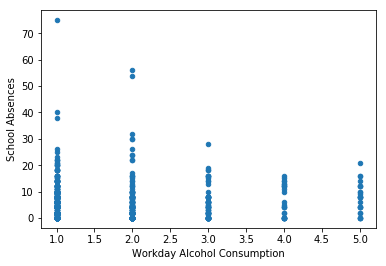

In [12]:
## YOUR CODE HERE
plt.scatter(df['workday_alc'], df['school_absences'], s=20)
plt.xlabel('Workday Alcohol Consumption')
plt.ylabel('School Absences')
workday_absence = plt.gcf()
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

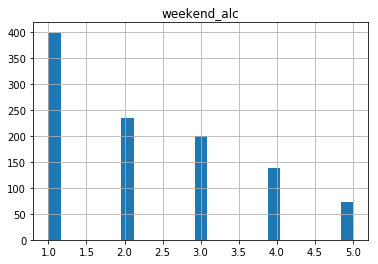

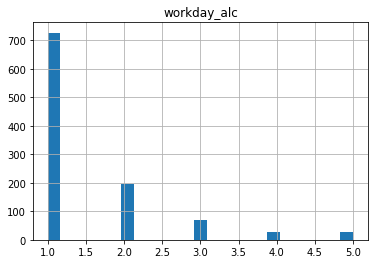

In [16]:

#maybe talk about how more students consume alcohol on the weekends than during the workday
f4 = df.hist('weekend_alc',bins=25)
f5 = df.hist('workday_alc',bins=25)
f4 = plt.gcf()
f5 = plt.gcf()

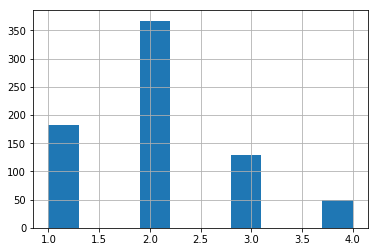

In [33]:
#study time of students who put 1 as their level of alcohol consumption during workdays
workday = df[df['workday_alc'] == 1]['study_time']
f2 = workday.hist()
f2 = plt.gcf()

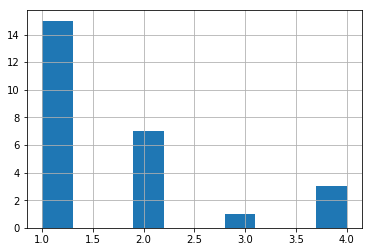

In [32]:
#study time of students who put 5 as their level of alcohol consumption during workdays
workday1 = df[df['workday_alc'] == 5]['study_time']
f1 = workday1.hist()
f1 = plt.gcf()

2    367
1    182
3    129
4     49
Name: study_time, dtype: int64


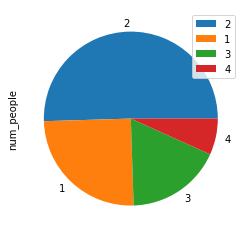

In [51]:
num_people = df[df['workday_alc'] == 1]['study_time'].value_counts()

print(num_people)
#plt.pie(df['workday_alc'] == 1, labels = df['study_time'], startangle=90, autopct='%.1f%%')
df_pie = pd.DataFrame({'num_people':num_people},
                     index = [2,1,3,4])
df_pie.plot.pie(y='num_people')
#plt.show()

1    15
2     7
4     3
3     1
Name: study_time, dtype: int64


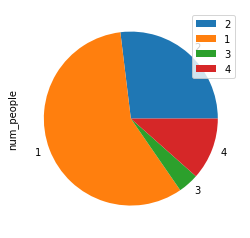

In [52]:
num_people = df[df['workday_alc'] == 5]['study_time'].value_counts()

print(num_people)
#plt.pie(df['workday_alc'] == 1, labels = df['study_time'], startangle=90, autopct='%.1f%%')
df_pie = pd.DataFrame({'num_people':num_people},
                     index = [2,1,3,4])
df_pie.plot.pie(y='num_people')

In [67]:
w_a = df['workday_alc'].unique()
# Exclude 5 because sample is too small
w_a = [1,2,3,4,5]
avg_study = []
for i in w_a:
    temp_study = df[df['workday_alc'] == i]['study_time']
    avg_study.append(np.mean(temp_study))
avg_study
#plt.plot(x=w_a, y=avg_study)
#plt.show()
df_l = pd.DataFrame({'avg_study':avg_study},
                     index = w_a)
#lines = df_l.plot.line()
avg_study
df['workday_alc'].value_counts()

1    727
2    196
3     69
5     26
4     26
Name: workday_alc, dtype: int64

In [68]:
df.columns

Index(['study_time', 'paid_classes', 'failures_of_class', 'want_higher_edu',
       'workday_alc', 'weekend_alc', 'school_absences', 'final_grades'],
      dtype='object')

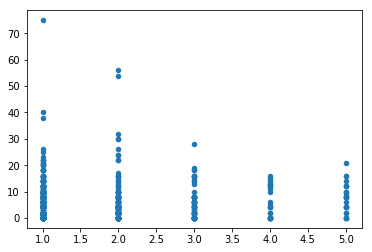

In [78]:
plt.scatter(df['workday_alc'], df['school_absences'], s=20)

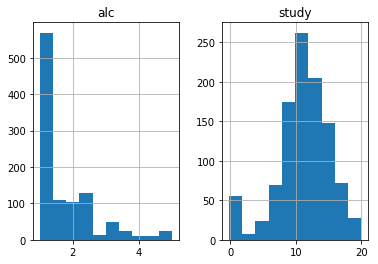

In [81]:
#higher_edu = df['want_higher_edu']
    
study_will = (0.1*df['study_time'])-(0.1*df['failures_of_class'])-(0.1*df['school_absences'])+(df['final_grades'])
study_will
alc = 5/7*df['workday_alc']+2/7*df['weekend_alc']
alc
df_w = pd.DataFrame({'alc':alc,
                    'study':study_will})
df_w
#plt.scatter(df_w['study'], df_w['alc'], s=20)
#plt.ylabel('Alcohol Consumption')
#plt.xlabel('School')
f1 = df_w.hist()
f1 = plt.gcf()

# Ethics & Privacy

An ethical issue we need to consider for our project is privacy. We are exploring a topic that not only reveals that the number of students who perform underage drinking but also forces us to analyze some of their personal backgrounds. The dataset we are using contains a lot of personal information about each student, such as their sex, age, address, family size, parental cohabitation status, parent’s education level, parent’s jobs, the reason they chose to attend their school, guardian, travel time from home to school, study time, number of failed classes, whether they receive extra educational support, whether they receive family education support, whether they take extra paid classes, extracurricular classes, and whether they attended nursery school. Although these data sets consists of a lot of data about each student’s personal background, we justified the use of this dataset because a majority of the information provided to us is binary or numerical, which means that we do not have access to the details of these aspects of their lives. For example, we do not actually have access to their specific addresses. Instead, we only know if they live in a rural or urban area. The information we will analyze is very general and privacy is not entirely a huge issue in this case. However, we will continue to acknowledge how this information is still private to some extent as we work on our project.
	The data is completely anonymous so although we have information on different individuals, we do not have access to who they actually are. The information comes from a survey of students taking Math and Portuguese classes at a secondary school. There is consent since the students willingly filled out the survey with their information. The data may not be representative of the general high school population because it only consists of the population of high school students taking Math and Portuguese classes. Also, since the data is from surveys, then there may be bias in our data since the students may not have answered honestly, or they may have misread the question and answered differently. This means that the data may not fully represent the true answers of the students who took the survey. Although this may be an issue, it is is not a significant problem in our project because even though these are answers from a survey, they are answers that do not reflect specific opinions on things so there is not a significant issue with bias. The survey simply gathers mainly objective information about the student’s life, so there is a very low chance of bias in our data.


# Conclusion & Discussion

*Fill in your discussion information here*